### Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data

In [2]:
df = pd.read_csv('./russia_losses_equipment.csv')

In [3]:
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


### Data cleaning and preperation

In [4]:
df2 = df.drop(columns=['date','day',"special equipment","mobile SRBM system"])

In [6]:
df2.head()

,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare
0,10,7,80,516,49,4,100,60,0,2,0
1,27,26,146,706,49,4,130,60,2,2,0
2,27,26,150,706,50,4,130,60,2,2,0
3,29,29,150,816,74,21,291,60,3,2,5
4,29,29,198,846,77,24,305,60,3,2,7


In [8]:
df.shape

(50, 15)

### defining a function to add total artillery loss per day

In [9]:
def add_columns():
    total =[]
    start = np.arange(50)
    for x in start:
        total.append(sum(df2.iloc[x,:]))
    return total
        

### defining the dependent and independent variables from the dataframe columns

In [10]:
df2['total'] = add_columns()

In [11]:
df2.head()

,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,total
0,10,7,80,516,49,4,100,60,0,2,0,828
1,27,26,146,706,49,4,130,60,2,2,0,1152
2,27,26,150,706,50,4,130,60,2,2,0,1157
3,29,29,150,816,74,21,291,60,3,2,5,1480
4,29,29,198,846,77,24,305,60,3,2,7,1580


#### X represents the independent variables while y represents the dependent variable

In [14]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

### correlation matrix using seaborn

<AxesSubplot:>

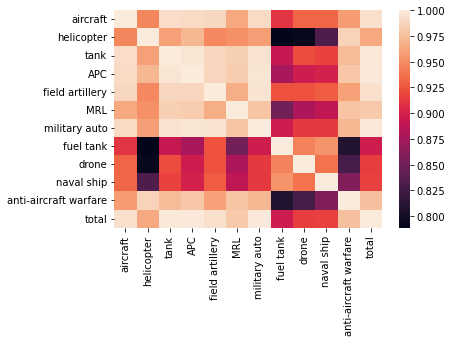

In [15]:
sns.heatmap(df2.corr())

### splitting the data into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### fitting data to the linear regression model

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### predicting X using the regression model


In [19]:
y_pred = regressor.predict(X_test)

In [21]:
y_pred

array([4075., 2214., 2117., 4921., 1157., 3927., 4710., 4277., 3469.,
       1580.])

### the model's r2_score

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0